In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
# Read data
data = pd.read_excel('ordet.xlsx')
X = data.values

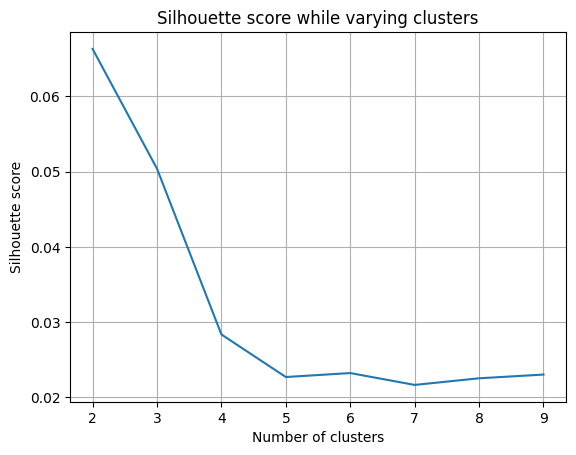

In [3]:
# Preprocessing pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())
])
X = pipeline.fit_transform(X)

# compute silhouette score given X and n_clusters (only for Kmeans)
def silhouette_computation(X, n_clusters):
    kmeans = KMeans(n_init='auto', n_clusters=n_clusters)
    kmeans.fit(X)
    return silhouette_score(X, kmeans.labels_)

scores = [silhouette_computation(X, nc) for nc in range(2, 10)]

plt.plot(np.arange(2, 10), scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score while varying clusters')
plt.grid()
plt.show()

In [4]:
# TODO: same principle here, vary eps and min_samples
db = DBSCAN(eps=0.01, min_samples=5).fit(X)

try:
    silhouette_score(X, db.labels_)
except:
    pass

In [5]:
processing_pipe = Pipeline([
    ('pca', PCA(n_components=10)),
    ('kmeans', KMeans(n_init='auto', n_clusters=2))
])

processing_pipe.fit(X)
silhouette_score(X, processing_pipe['kmeans'].labels_)

0.06486502948911946

**Classification**

In [21]:
# 1. select relevant features (e.g., rPb_plasma and rV_plasma), and 
# 2. select label for classification/regression
# in this case, we use "hypertension"
# classification's goal is to state if given rPb_plasma and rV_plasma
# a subject has hyptertension (1, i.e., yes) or not (0)
# this is a binary classification problem; we'll use a decision tree
# NOTE this is a quick and dirty hack to drop NaNs. Use a Simple imputer or,
# even better, a KnnImputer from sklearn
data_clf = data[['rPb_plasma', 'rV_plasma', 'hypertension']].dropna()
X_clf = data_clf[['rPb_plasma', 'rV_plasma']].values
y_clf = data_clf['hypertension'].values

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_tr, X_test, y_tr, y_test = train_test_split(X_clf, y_clf)

# train on training
dt = DecisionTreeClassifier()
dt.fit(X_tr, y_tr)
# eval accuracy
y_pred = dt.predict(X_test)
accuracy_score(y_pred, y_test)


0.7012987012987013

Accuracy is $70\%$, but we can improve it in several ways:
* use more samples after imputation;
* compare with other classifiers (Random Forest, MLP, etc.);
* use cross validation (KFoldCV in Scikit Learn);
* perform hyperparameters optimization (start with grid search, move towards more sophisticated approaches);
* embed other metrics in the evaluation (precision, recall, F1)